In [1]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import BatchNormalization, Conv2DTranspose, LeakyReLU, Reshape, Activation
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

init_notebook_mode(connected=True)

In [2]:
img_size = 64
batch_size = 64

def scaling(x):
    x = (x-127.5)/127.5 
    return x
    

datagen = ImageDataGenerator(preprocessing_function=scaling)

data_generator = datagen.flow_from_directory(directory='/kaggle/input/celeba-face-recognition-triplets/CelebA FR Triplets/CelebA FR Triplets',
                                        target_size=(img_size,img_size),
                                        class_mode=None,
                                        batch_size=batch_size,
                                        classes=['images'],
                                        shuffle=True)

samples = data_generator.samples

Found 46371 images belonging to 1 classes.


# Visualization of Images

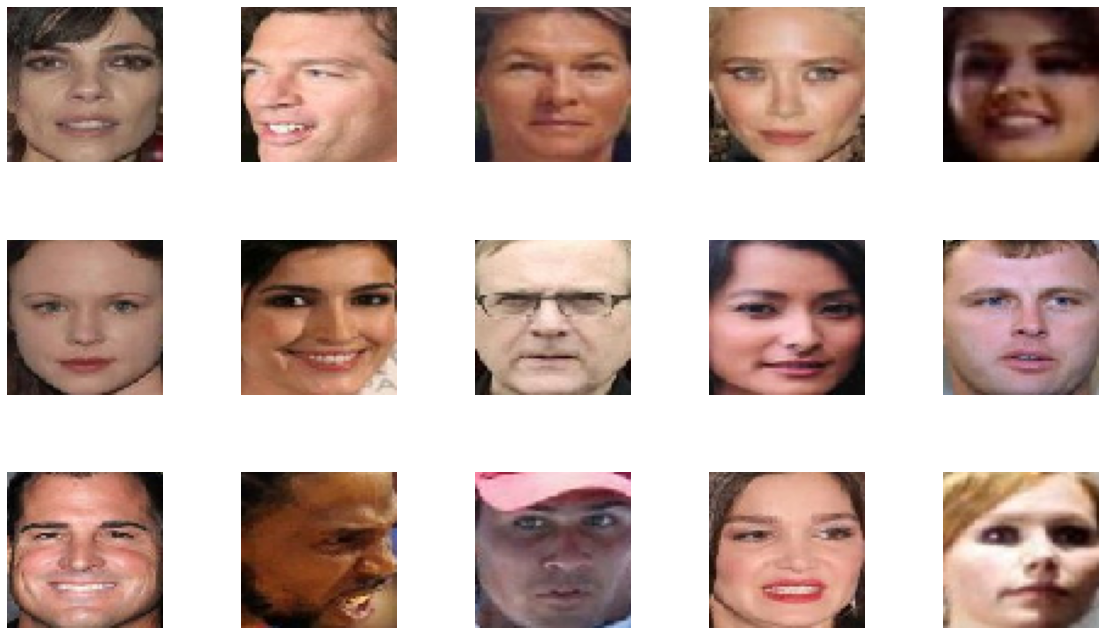

In [3]:
images = data_generator.__next__()

plt.figure(figsize = (20 , 20))
for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow((images[i]+1)/2)
    plt.axis('off')

In [4]:
discriminator = Sequential(
    [
        Input(shape=(64, 64, 3)),
        Conv2D(32, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(64, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(128, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(256, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Conv2D(256, kernel_size=5, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(0.2),
        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid"),
    ],
    name="discriminator",
)
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 128)       

In [5]:
latent_dim = 256
generator = Sequential(
    [
        Input(shape=(latent_dim,)),
        Dense(4 * 4 * 256),
        Reshape((4, 4, 256)),
        Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2DTranspose(64, kernel_size=4, strides=2, padding="same"),
        BatchNormalization(),
        LeakyReLU(alpha=0.2),
        Conv2D(3, kernel_size=5, padding="same", activation="tanh"),
    ],
    name="generator",
)
generator.summary()

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4096)              1052672   
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 256)         1048832   
_________________________________________________________________
batch_normalization_5 (Batch (None, 8, 8, 256)         1024      
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 128)       524416    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)       51

Epoch:  0


100%|██████████| 725/725 [07:44<00:00,  1.56it/s]


Epoch: 0 Generator Loss: 1.1341100931167603 Discriminator Loss: 0.5991389155387878


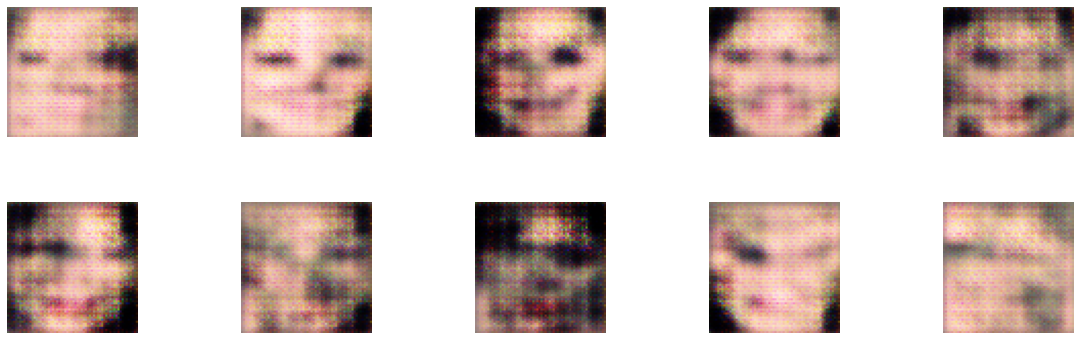

Epoch:  1


100%|██████████| 725/725 [02:39<00:00,  4.54it/s]


Epoch: 1 Generator Loss: 0.9542072415351868 Discriminator Loss: 0.6385930180549622
Epoch:  2


100%|██████████| 725/725 [02:59<00:00,  4.04it/s]


Epoch: 2 Generator Loss: 0.9036222100257874 Discriminator Loss: 0.650440514087677
Epoch:  3


100%|██████████| 725/725 [02:47<00:00,  4.33it/s]


Epoch: 3 Generator Loss: 0.881351113319397 Discriminator Loss: 0.6559991836547852
Epoch:  4


100%|██████████| 725/725 [02:48<00:00,  4.29it/s]


Epoch: 4 Generator Loss: 0.8708159327507019 Discriminator Loss: 0.658930242061615
Epoch:  5


100%|██████████| 725/725 [02:43<00:00,  4.43it/s]


Epoch: 5 Generator Loss: 0.864750862121582 Discriminator Loss: 0.660667896270752


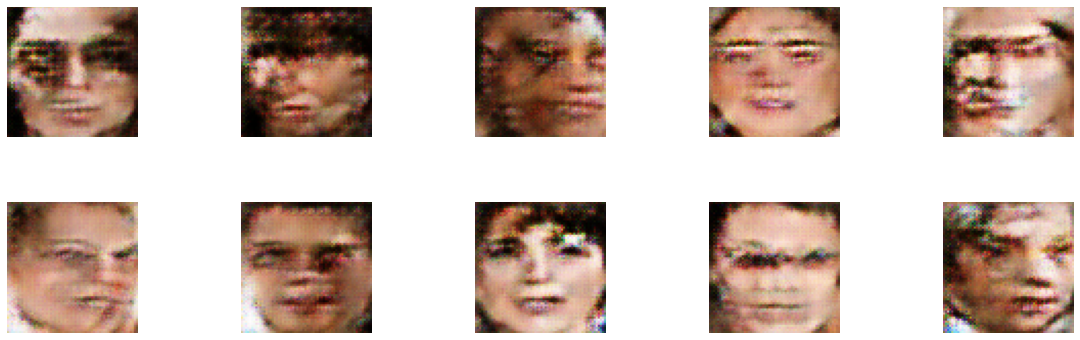

Epoch:  6


100%|██████████| 725/725 [02:45<00:00,  4.39it/s]


Epoch: 6 Generator Loss: 0.8592792749404907 Discriminator Loss: 0.6623596549034119
Epoch:  7


100%|██████████| 725/725 [02:46<00:00,  4.34it/s]


Epoch: 7 Generator Loss: 0.8531751036643982 Discriminator Loss: 0.6640049815177917
Epoch:  8


100%|██████████| 725/725 [02:49<00:00,  4.27it/s]


Epoch: 8 Generator Loss: 0.8481744527816772 Discriminator Loss: 0.6653861403465271
Epoch:  9


100%|██████████| 725/725 [02:50<00:00,  4.26it/s]


Epoch: 9 Generator Loss: 0.8428625464439392 Discriminator Loss: 0.6667128801345825
Epoch:  10


100%|██████████| 725/725 [02:46<00:00,  4.34it/s]


Epoch: 10 Generator Loss: 0.8385049104690552 Discriminator Loss: 0.6677584052085876


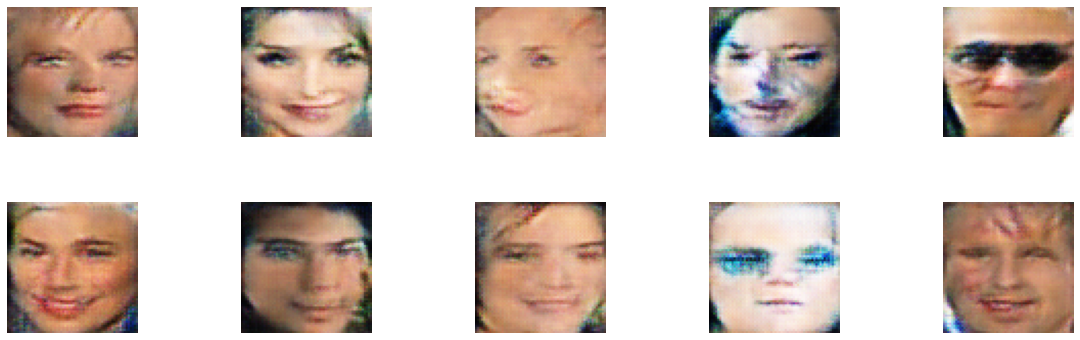

Epoch:  11


100%|██████████| 725/725 [02:48<00:00,  4.30it/s]


Epoch: 11 Generator Loss: 0.8343479633331299 Discriminator Loss: 0.668721616268158
Epoch:  12


100%|██████████| 725/725 [02:48<00:00,  4.31it/s]


Epoch: 12 Generator Loss: 0.8309705853462219 Discriminator Loss: 0.6694682836532593
Epoch:  13


100%|██████████| 725/725 [02:46<00:00,  4.36it/s]


Epoch: 13 Generator Loss: 0.8281177878379822 Discriminator Loss: 0.6700437068939209
Epoch:  14


100%|██████████| 725/725 [02:49<00:00,  4.28it/s]


Epoch: 14 Generator Loss: 0.8255996108055115 Discriminator Loss: 0.670508861541748
Epoch:  15


100%|██████████| 725/725 [02:46<00:00,  4.35it/s]


Epoch: 15 Generator Loss: 0.8236200213432312 Discriminator Loss: 0.6708823442459106


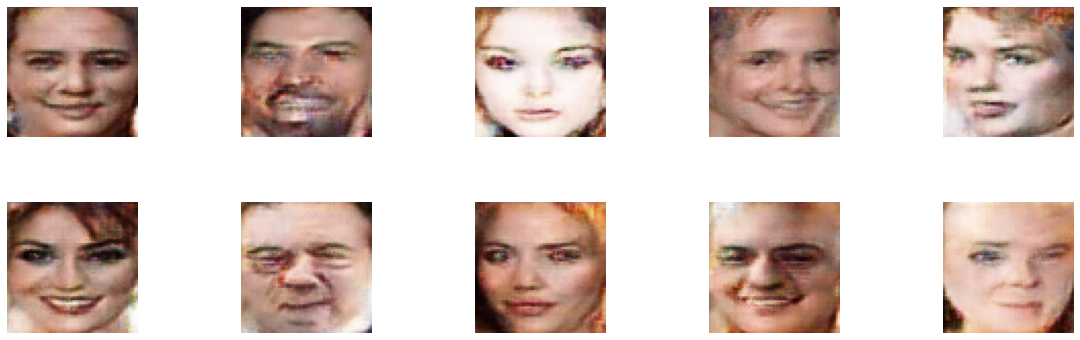

Epoch:  16


100%|██████████| 725/725 [02:47<00:00,  4.33it/s]


Epoch: 16 Generator Loss: 0.8220844864845276 Discriminator Loss: 0.6711379885673523
Epoch:  17


100%|██████████| 725/725 [02:49<00:00,  4.27it/s]


Epoch: 17 Generator Loss: 0.820849597454071 Discriminator Loss: 0.6712918877601624
Epoch:  18


100%|██████████| 725/725 [02:47<00:00,  4.32it/s]


Epoch: 18 Generator Loss: 0.8201664090156555 Discriminator Loss: 0.6712911128997803
Epoch:  19


100%|██████████| 725/725 [02:47<00:00,  4.34it/s]


Epoch: 19 Generator Loss: 0.8197994232177734 Discriminator Loss: 0.6712391972541809
Epoch:  20


100%|██████████| 725/725 [02:48<00:00,  4.31it/s]


Epoch: 20 Generator Loss: 0.8196437954902649 Discriminator Loss: 0.6710694432258606


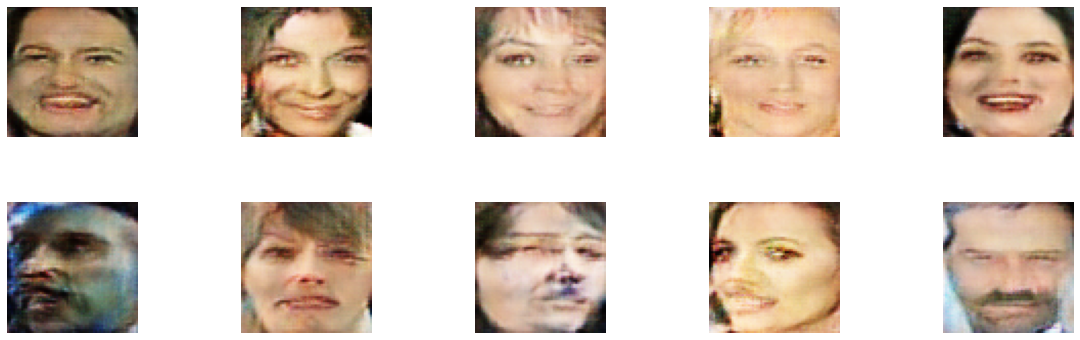

Epoch:  21


100%|██████████| 725/725 [02:47<00:00,  4.33it/s]


Epoch: 21 Generator Loss: 0.8198534846305847 Discriminator Loss: 0.6708528399467468
Epoch:  22


100%|██████████| 725/725 [02:45<00:00,  4.37it/s]


Epoch: 22 Generator Loss: 0.820496141910553 Discriminator Loss: 0.6705123782157898
Epoch:  23


100%|██████████| 725/725 [02:42<00:00,  4.45it/s]


Epoch: 23 Generator Loss: 0.8214790225028992 Discriminator Loss: 0.6700954437255859
Epoch:  24


100%|██████████| 725/725 [02:43<00:00,  4.43it/s]


Epoch: 24 Generator Loss: 0.8228893876075745 Discriminator Loss: 0.6695669293403625
Epoch:  25


100%|██████████| 725/725 [02:43<00:00,  4.44it/s]


Epoch: 25 Generator Loss: 0.8246446847915649 Discriminator Loss: 0.6689302325248718


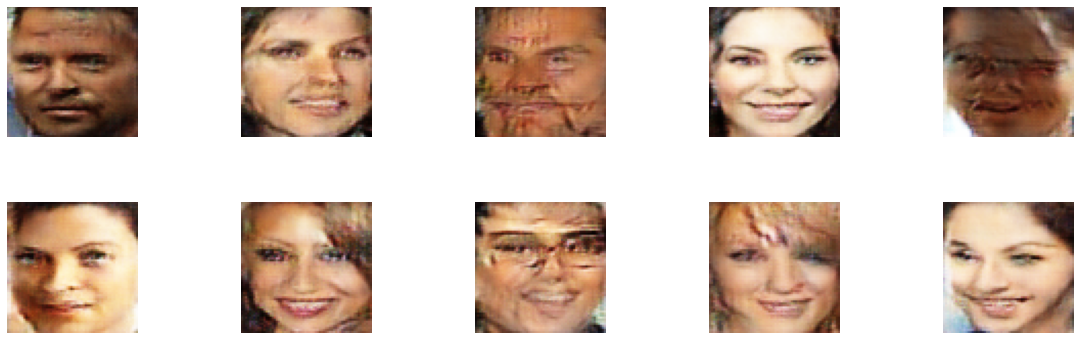

Epoch:  26


100%|██████████| 725/725 [02:41<00:00,  4.50it/s]


Epoch: 26 Generator Loss: 0.826728105545044 Discriminator Loss: 0.6681926846504211
Epoch:  27


100%|██████████| 725/725 [02:41<00:00,  4.50it/s]


Epoch: 27 Generator Loss: 0.8292115330696106 Discriminator Loss: 0.6673516631126404
Epoch:  28


100%|██████████| 725/725 [02:42<00:00,  4.46it/s]


Epoch: 28 Generator Loss: 0.831960916519165 Discriminator Loss: 0.6663994193077087
Epoch:  29


100%|██████████| 725/725 [02:46<00:00,  4.35it/s]


Epoch: 29 Generator Loss: 0.835096001625061 Discriminator Loss: 0.6653589010238647
Epoch:  30


100%|██████████| 725/725 [02:42<00:00,  4.45it/s]


Epoch: 30 Generator Loss: 0.8383702635765076 Discriminator Loss: 0.6642676591873169


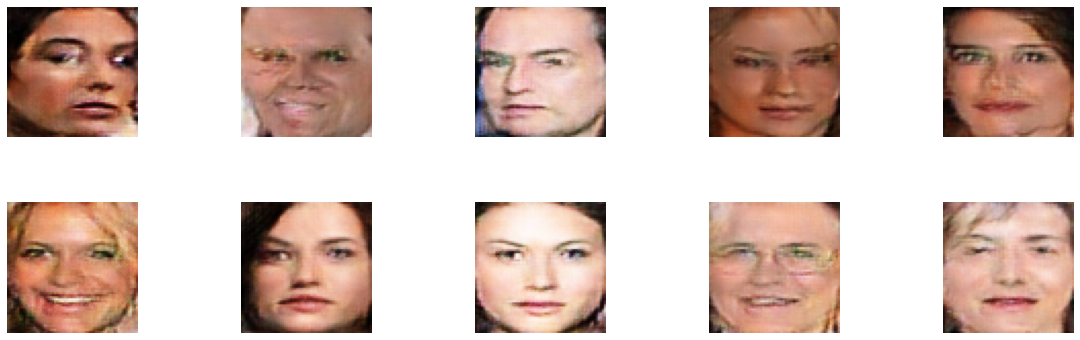

Epoch:  31


100%|██████████| 725/725 [02:39<00:00,  4.55it/s]


Epoch: 31 Generator Loss: 0.8420069217681885 Discriminator Loss: 0.6630208492279053
Epoch:  32


100%|██████████| 725/725 [02:38<00:00,  4.58it/s]


Epoch: 32 Generator Loss: 0.8459886908531189 Discriminator Loss: 0.6617100238800049
Epoch:  33


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 33 Generator Loss: 0.850058376789093 Discriminator Loss: 0.6603810787200928
Epoch:  34


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 34 Generator Loss: 0.8546341061592102 Discriminator Loss: 0.6589311957359314
Epoch:  35


100%|██████████| 725/725 [02:40<00:00,  4.50it/s]


Epoch: 35 Generator Loss: 0.8595240712165833 Discriminator Loss: 0.6573522090911865


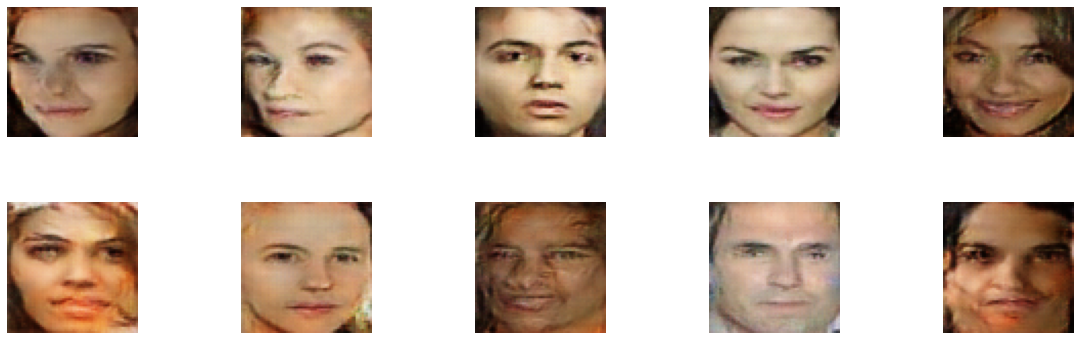

Epoch:  36


100%|██████████| 725/725 [02:42<00:00,  4.47it/s]


Epoch: 36 Generator Loss: 0.8646515607833862 Discriminator Loss: 0.6557007431983948
Epoch:  37


100%|██████████| 725/725 [02:57<00:00,  4.09it/s]


Epoch: 37 Generator Loss: 0.8700793981552124 Discriminator Loss: 0.6539735794067383
Epoch:  38


100%|██████████| 725/725 [02:51<00:00,  4.22it/s]


Epoch: 38 Generator Loss: 0.8759121298789978 Discriminator Loss: 0.6521314978599548
Epoch:  39


100%|██████████| 725/725 [02:47<00:00,  4.33it/s]


Epoch: 39 Generator Loss: 0.8819748759269714 Discriminator Loss: 0.65019690990448
Epoch:  40


100%|██████████| 725/725 [02:41<00:00,  4.48it/s]


Epoch: 40 Generator Loss: 0.8883416056632996 Discriminator Loss: 0.6482161283493042


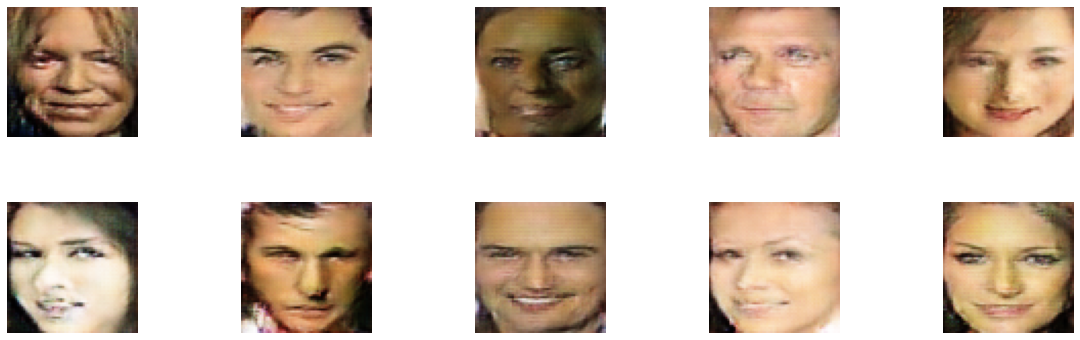

Epoch:  41


100%|██████████| 725/725 [02:41<00:00,  4.50it/s]


Epoch: 41 Generator Loss: 0.8949251174926758 Discriminator Loss: 0.6461397409439087
Epoch:  42


100%|██████████| 725/725 [02:42<00:00,  4.45it/s]


Epoch: 42 Generator Loss: 0.9018253087997437 Discriminator Loss: 0.6440117955207825
Epoch:  43


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 43 Generator Loss: 0.9088212251663208 Discriminator Loss: 0.6418004631996155
Epoch:  44


100%|██████████| 725/725 [02:38<00:00,  4.56it/s]


Epoch: 44 Generator Loss: 0.9160984754562378 Discriminator Loss: 0.6395363807678223
Epoch:  45


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 45 Generator Loss: 0.9237438440322876 Discriminator Loss: 0.6371907591819763


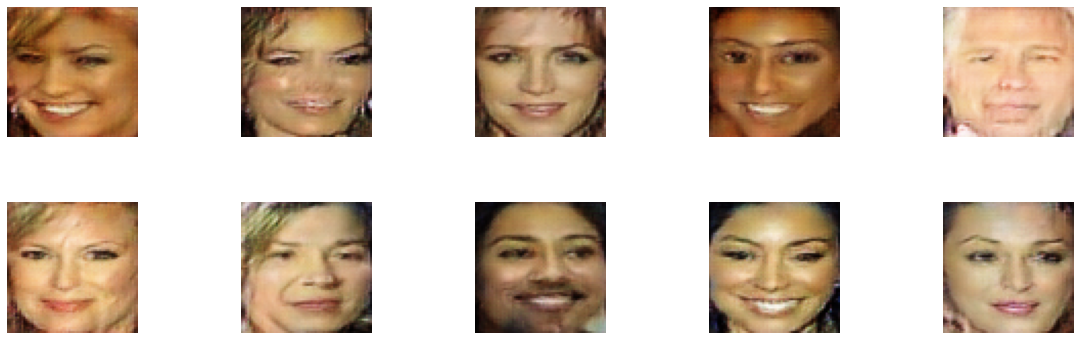

Epoch:  46


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 46 Generator Loss: 0.9315786957740784 Discriminator Loss: 0.6347802877426147
Epoch:  47


100%|██████████| 725/725 [02:38<00:00,  4.57it/s]


Epoch: 47 Generator Loss: 0.9396017789840698 Discriminator Loss: 0.6322941780090332
Epoch:  48


100%|██████████| 725/725 [02:39<00:00,  4.55it/s]


Epoch: 48 Generator Loss: 0.9479093551635742 Discriminator Loss: 0.6298195719718933
Epoch:  49


100%|██████████| 725/725 [02:38<00:00,  4.58it/s]


Epoch: 49 Generator Loss: 0.9564917087554932 Discriminator Loss: 0.6272490620613098
Epoch:  50


100%|██████████| 725/725 [02:39<00:00,  4.55it/s]


Epoch: 50 Generator Loss: 0.9653328061103821 Discriminator Loss: 0.6246250867843628


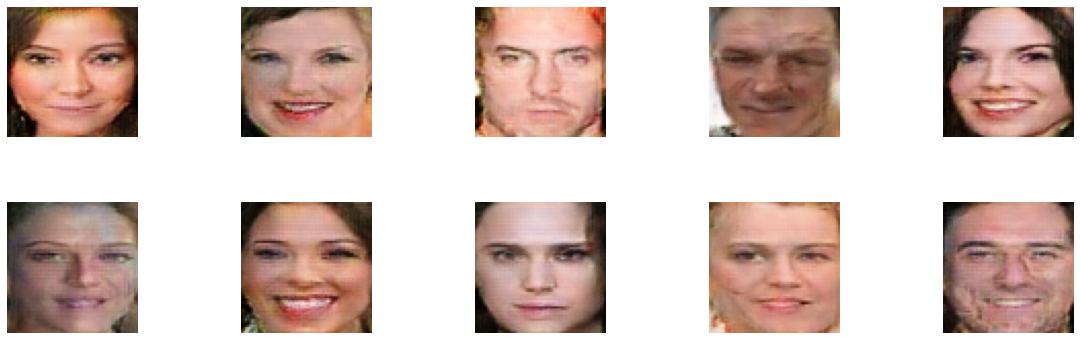

In [6]:
gen_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
dis_optimizer = tf.keras.optimizers.Adamax(learning_rate=0.0002, beta_1=0.5)
loss_fn = tf.keras.losses.BinaryCrossentropy()
epochs=50
steps_per_epoch = int(-(samples/-batch_size))

disc_losses = []
gen_losses = []

for epoch in range(epochs+1):
    print("Epoch: ",epoch)
    for idx, (real) in enumerate(tqdm(data_generator)):
        if idx > steps_per_epoch:
            break
        
        batch_size = real.shape[0]
        random_latent_vectors = tf.random.normal(shape = (batch_size, latent_dim))
        fake = generator(random_latent_vectors)

        with tf.GradientTape() as d_tape:
            loss_disc_real = loss_fn(tf.ones((batch_size, 1)), discriminator(real))
            loss_disc_fake = loss_fn(tf.zeros((batch_size, 1)), discriminator(fake))
            loss_disc = (loss_disc_real + loss_disc_fake)/2
            disc_losses.append(loss_disc)

        grads = d_tape.gradient(loss_disc, discriminator.trainable_weights)
        dis_optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))

        with tf.GradientTape() as g_tape:
            fake = generator(random_latent_vectors)
            output = discriminator(fake)
            loss_gen = loss_fn(tf.ones(batch_size, 1), output)
            gen_losses.append(loss_gen)

        grads = g_tape.gradient(loss_gen, generator.trainable_weights)
        gen_optimizer.apply_gradients(zip(grads, generator.trainable_weights))
    
    mean_disc_loss = sum(disc_losses)/len(disc_losses)
    mean_gen_loss = sum(gen_losses)/len(gen_losses)
    
    print(f"Epoch: {epoch} Generator Loss: {mean_gen_loss} Discriminator Loss: {mean_disc_loss}")
    data_generator.on_epoch_end()
    
    if epoch % 5 == 0:
        random_latent_vectors = tf.random.normal(shape = (10, latent_dim))
        fake = generator(random_latent_vectors)
        generated_images = fake.numpy()
        plt.figure(figsize = (20 , 6))
        for i in range(10):
            plt.subplot(2 , 5, i+1)
            plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
            image = generated_images[i]
            plt.imshow((image+1)/2)
            plt.axis('off')
        plt.show()

In [12]:
random_latent_vectors = tf.random.normal(shape = (30, latent_dim))
fake = generator.predict(random_latent_vectors)

# Exploration of Latent Space
- Lets play around with the latent space features. We can identify the different features in the generated images like the gender of the face and whether the person is smiling or not
- Lets try to perform some latent space arithmatic to generate faces with specific attributes
- First we will index all the generated faces and assign them some labels

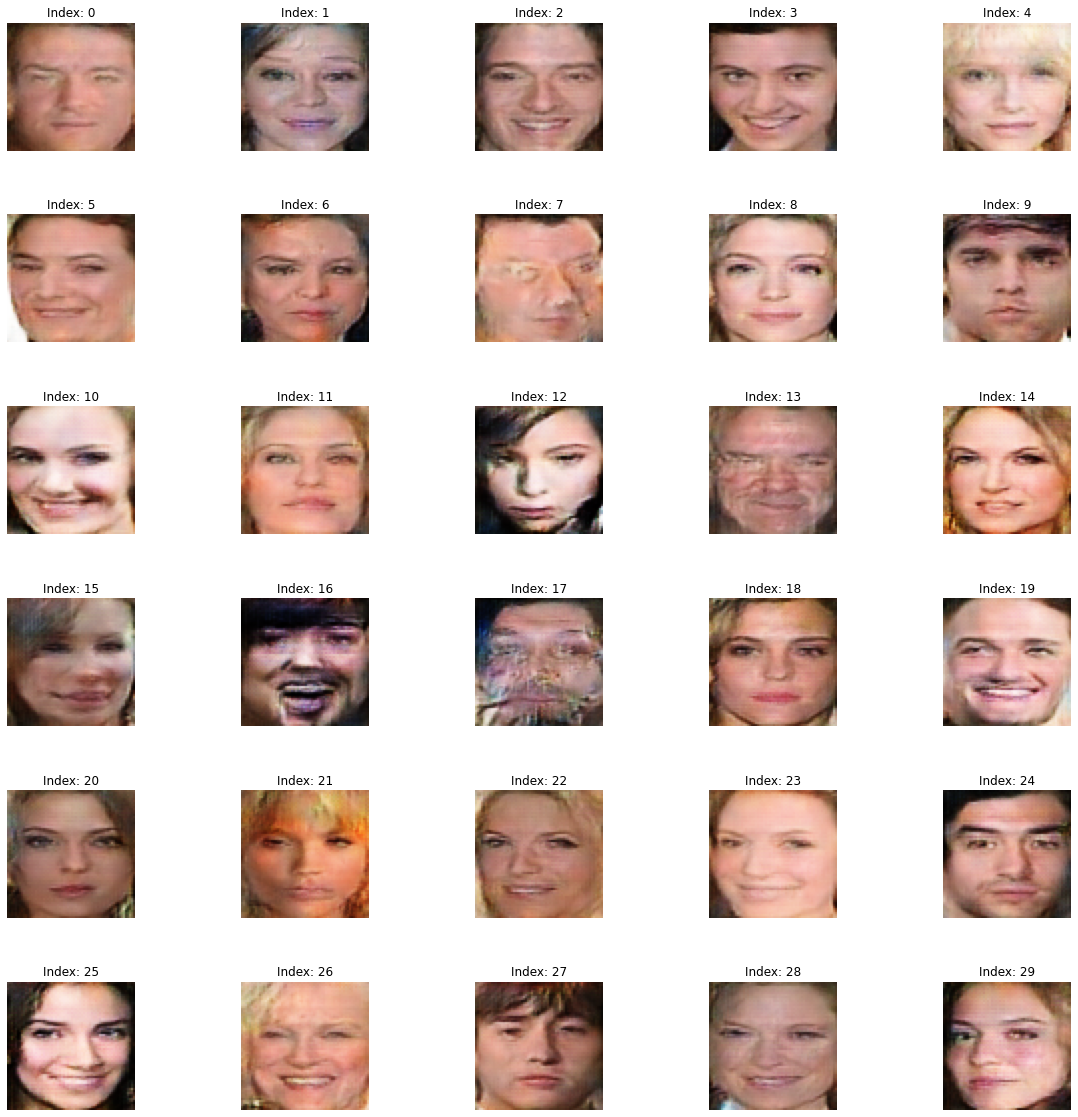

In [13]:
plt.figure(figsize = (20 , 20))
for i in range(30):
    plt.subplot(6 , 5, i+1)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow((fake[i]+1)/2)
    plt.title(f"Index: {i}")
    plt.axis('off')
plt.show()

# Latent Space Arithmatic 
- Faces at index 18, 21 and 22 are of women who are smiling
- Faces at index 8, 17 and 29 are of women who have neutral expressions
- Faces at index 5, 9 and 10 are of men who have a neutral expression

Lets first create an average of the random latent vectors of these faces so that we get the robust latent space representations of these images. We then perform simple arithmetic operations on these latent vector representations.

Example:-

**Smiling Man** = **Smiling Woman** - **Neutral Woman** + **Neutral Man**

<img src='https://machinelearningmastery.com/wp-content/uploads/2019/05/Example-of-Vector-Arithmetic-on-Points-in-the-Latent-Space-for-Generating-Faces-with-a-GAN-1024x531.png'>

In [14]:
smiling_woman = (random_latent_vectors[25] + random_latent_vectors[26] + random_latent_vectors[28]) / 3
neutral_woman = (random_latent_vectors[20] + random_latent_vectors[11] + random_latent_vectors[8]) / 3
neutral_man = (random_latent_vectors[0] + random_latent_vectors[9] + random_latent_vectors[24]) / 3

smiling_man = smiling_woman - neutral_woman + neutral_man

In [15]:
sample1 = generator.predict(np.expand_dims(smiling_woman,axis=0))
sample2 = generator.predict(np.expand_dims(neutral_woman,axis=0))
sample3 = generator.predict(np.expand_dims(neutral_man,axis=0))
result = generator.predict(np.expand_dims(smiling_man,axis=0))

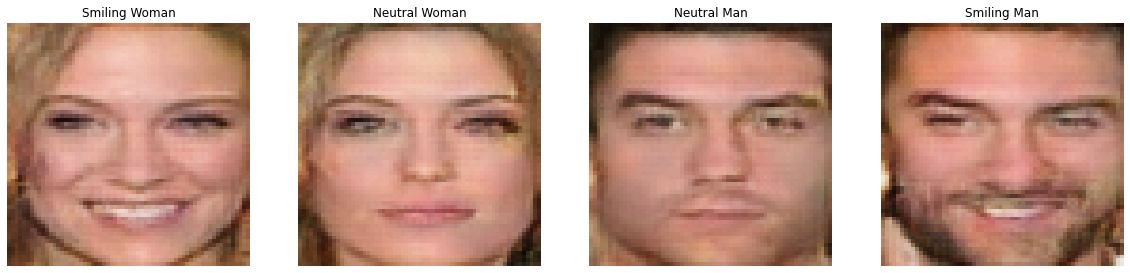

In [16]:
plt.figure(figsize = (20 , 6))
plt.subplot(1,4,1)
plt.imshow((sample1[0]+1)/2)
plt.title("Smiling Woman")
plt.axis('off')
plt.subplot(1,4,2)
plt.imshow((sample2[0]+1)/2)
plt.title("Neutral Woman")
plt.axis('off')
plt.subplot(1,4,3)
plt.imshow((sample3[0]+1)/2)
plt.title("Neutral Man")
plt.axis('off')
plt.subplot(1,4,4)
plt.imshow((result[0]+1)/2)
plt.title("Smiling Man")
plt.axis('off')
plt.show()